In [1]:
import pandas as pd
from bs4 import BeautifulSoup
import requests

In [2]:
URL = "https://www.amazon.com/s?k=playstation+5&crid=3BV45YDFQQE2G&sprefix=playstation+4%2Caps%2C269&ref=nb_sb_noss_2"

In [3]:
# headers for request
HEADERS = ({'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/138.0.0.0 Safari/537.36 Edg/138.0.0.0','Accept-Language': 'en-US, en;q=0.5'})

In [4]:
webpage = requests.get(URL, headers=HEADERS)

webpage.content

In [5]:
type(webpage.content)

bytes

In [6]:
# Soup Object containiang all data
soup = BeautifulSoup(webpage.content, "html.parser")

In [7]:
# Fetch links as List of Tag Objects
links = soup.find_all("a", attrs={'class':"a-size-base a-link-normal s-underline-text s-underline-link-text s-link-style a-text-bold"})

In [8]:
links

[<a class="a-size-base a-link-normal s-underline-text s-underline-link-text s-link-style a-text-bold" href="/Assassins-Creed-Shadows-Limited-Exclusive-PlayStation/dp/B0D47WTKPM/ref=sr_1_1?crid=3BV45YDFQQE2G&amp;dib=eyJ2IjoiMSJ9.xAaH2aVMLUTCIMyMSMnsnDhVPu4nU8188PQjDlKndLHJqLne1PUFZsxXLD0ZUIrxSJBBsGEi--3OrOLjlqtTiOzrtSs2fDV1kNqrBIkDFh6K-_i47AbIrHK2ZzQaHHo2oiylO0jPKhQbZpVsx-_3G5kS6lxlYl1AlVi-s1U-Nj7vkD_jNiCAyNHeFdAOupjoFJNeTcwc2F2Hv9lW9yt162HraSUxxdCEDndp8WoTxqk.o1ZhOPhc2bv7lo78DVj_70yovhsmLp8eY0Cb9LvqM2I&amp;dib_tag=se&amp;keywords=playstation+5&amp;qid=1752296680&amp;sprefix=playstation+4%2Caps%2C269&amp;sr=8-1">PlayStation 5</a>,
 <a class="a-size-base a-link-normal s-underline-text s-underline-link-text s-link-style a-text-bold" href="/Assassins-Creed-Shadows-Limited-Exclusive-One/dp/B0D47WHMQD/ref=sr_1_1?crid=3BV45YDFQQE2G&amp;dib=eyJ2IjoiMSJ9.xAaH2aVMLUTCIMyMSMnsnDhVPu4nU8188PQjDlKndLHJqLne1PUFZsxXLD0ZUIrxSJBBsGEi--3OrOLjlqtTiOzrtSs2fDV1kNqrBIkDFh6K-_i47AbIrHK2ZzQaHHo2oiylO0jPKhQbZp

In [9]:
 link = links[0].get('href')


In [10]:
product_list = "https://amazon.com" + link

In [11]:
product_list

'https://amazon.com/Assassins-Creed-Shadows-Limited-Exclusive-PlayStation/dp/B0D47WTKPM/ref=sr_1_1?crid=3BV45YDFQQE2G&dib=eyJ2IjoiMSJ9.xAaH2aVMLUTCIMyMSMnsnDhVPu4nU8188PQjDlKndLHJqLne1PUFZsxXLD0ZUIrxSJBBsGEi--3OrOLjlqtTiOzrtSs2fDV1kNqrBIkDFh6K-_i47AbIrHK2ZzQaHHo2oiylO0jPKhQbZpVsx-_3G5kS6lxlYl1AlVi-s1U-Nj7vkD_jNiCAyNHeFdAOupjoFJNeTcwc2F2Hv9lW9yt162HraSUxxdCEDndp8WoTxqk.o1ZhOPhc2bv7lo78DVj_70yovhsmLp8eY0Cb9LvqM2I&dib_tag=se&keywords=playstation+5&qid=1752296680&sprefix=playstation+4%2Caps%2C269&sr=8-1'

In [12]:
new_webpage = requests.get(product_list, headers=HEADERS)

In [13]:
new_webpage

<Response [200]>

In [14]:
# Soup Object containiang all data
new_soup = BeautifulSoup(new_webpage.content, "html.parser")


In [15]:
new_soup

<!DOCTYPE html>
<html class="a-no-js" data-19ax5a9jf="dingo" lang="en-us"><!-- sp:feature:head-start -->
<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>
<!-- sp:end-feature:head-start -->
<!-- sp:feature:csm:head-open-part1 -->
<script type="text/javascript">var ue_t0=ue_t0||+new Date();</script>
<!-- sp:end-feature:csm:head-open-part1 -->
<!-- sp:feature:cs-optimization -->
<meta content="on" http-equiv="x-dns-prefetch-control"/>
<link href="https://images-na.ssl-images-amazon.com" rel="dns-prefetch"/>
<link href="https://m.media-amazon.com" rel="dns-prefetch"/>
<link href="https://completion.amazon.com" rel="dns-prefetch"/>
<!-- sp:end-feature:cs-optimization -->
<!-- sp:feature:csm:head-open-part2 -->
<script type="text/javascript">
window.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;
if (window.ue_ihb === 1) {

var ue_csm = window,
    ue_hob = +new Date();
(function(d){var e=d.ue=d.ue||{},f=Date.now||function(){return+new Date};e.d=func

In [16]:
new_soup.find("span", attrs={"id":'productTitle'}).text.strip()

'Assassin’s Creed Shadows - Limited Edition (Amazon Exclusive), PlayStation 5'

In [17]:
new_soup.find("span", attrs={"class":'a-icon-alt'}).text


'4.6 out of 5 stars'

In [18]:
base_url = "https://amazon.com"
products_data = []

for link in links[:10]:  # Scrape top 10 products
    product_url = base_url + link.get('href')
    new_webpage = requests.get(product_url, headers=HEADERS)
    new_soup = BeautifulSoup(new_webpage.content, "html.parser")

    try:
        title = new_soup.find("span", attrs={"id": 'productTitle'}).text.strip()
    except:
        title = None

    try:
        price = new_soup.find("span", class_='a-price a-text-price a-size-medium').find("span", class_="a-offscreen").text
    except:
        price = None

    try:
        rating = new_soup.find("span", class_='a-icon-alt').text.strip()
    except:
        rating = None

    try:
        review_count = new_soup.find("span", {"id": "acrCustomerReviewText"}).text.strip()
    except:
        review_count = None

    try:
        bullets = new_soup.find("div", {"id": "feature-bullets"}).text.strip().replace('\n', ' | ')
    except:
        bullets = None

    products_data.append({
        "Title": title,
        "Price": price,
        "Rating": rating,
        "Review Count": review_count,
        "Description": bullets,
        "URL": product_url
    })

df = pd.DataFrame(products_data)
df.head()


,Title,Price,Rating,Review Count,Description,URL
0,Assassin’s Creed Shadows - Limited Edition (Am...,None,4.6 out of 5 stars,703 ratings,About this item Only at Amazon Limited Edit...,https://amazon.com/Assassins-Creed-Shadows-Lim...
1,Assassin’s Creed Shadows - Limited Edition (Am...,None,4.5 out of 5 stars,208 ratings,About this item Only at Amazon Limited Edit...,https://amazon.com/Assassins-Creed-Shadows-Lim...
2,PlayStation DualSense® Wireless Controller - W...,None,4.6 out of 5 stars,"36,418 ratings",About this item Bring gaming worlds to life...,https://amazon.com/PlayStation-DualSense%C2%AE...
3,Star Wars Outlaws - Limited Edition (Amazon Ex...,None,4.5 out of 5 stars,791 ratings,About this item Only at Amazon Limited Edit...,https://amazon.com/Star-Wars-Outlaws-Limited-E...
4,Star Wars Outlaws - Limited Edition (Amazon Ex...,None,4.5 out of 5 stars,328 ratings,About this item Only at Amazon Limited Edit...,https://amazon.com/Star-Wars-Outlaws-Limited-A...


In [21]:
import time

In [22]:
# STEP 3: Base URL and setup
base_url = "https://www.amazon.com"
search_query = "playstation+5"
all_product_links = []

In [23]:
 # STEP 4: Loop through pages 2 to 5 (you already scraped page 1 earlier)
for page in range(2, 6):  # Pages 2, 3, 4, 5
    print(f"\n📄 Now scraping search results from Page {page}...")
    search_url = f"{base_url}/s?k={search_query}&page={page}"
    
    # Send request to Amazon
    response = requests.get(search_url, headers=HEADERS)
    soup = BeautifulSoup(response.content, "html.parser")

    # Find all product blocks on the current page
    products = soup.find_all("div", {"data-component-type": "s-search-result"})
    print(f"🔗 Found {len(products)} product blocks on Page {page}")

    # Extract links from each product block
    for product in products:
        link_tag = product.find("a", class_="a-link-normal")
        if link_tag and link_tag.get("href"):
            full_link = base_url + link_tag.get("href")
            all_product_links.append(full_link)
    
    time.sleep(1)  # polite delay

print(f"\n✅ Total new product links collected (Pages 2-5): {len(all_product_links)}")


📄 Now scraping search results from Page 2...
🔗 Found 22 product blocks on Page 2

📄 Now scraping search results from Page 3...
🔗 Found 16 product blocks on Page 3

📄 Now scraping search results from Page 4...
🔗 Found 16 product blocks on Page 4

📄 Now scraping search results from Page 5...
🔗 Found 16 product blocks on Page 5

✅ Total new product links collected (Pages 2-5): 70


In [24]:
# STEP 5: Extract product details from collected links (limit to 40 to avoid overload)
products_data = []

for i, product_url in enumerate(all_product_links[:40]):
    print(f"\n🔍 Visiting product {i+1}: {product_url}")
    
    try:
        product_page = requests.get(product_url, headers=HEADERS)
        new_soup = BeautifulSoup(product_page.content, "html.parser")

        # Extract title
        try:
            title = new_soup.find("span", {"id": "productTitle"}).text.strip()
        except:
            title = None

        # Extract price
        try:
            price = new_soup.find("span", class_="a-price a-text-price a-size-medium").find("span", class_="a-offscreen").text
        except:
            try:
                price = new_soup.find("span", class_="a-offscreen").text
            except:
                price = None

        # Extract rating
        try:
            rating = new_soup.find("span", class_="a-icon-alt").text.strip()
        except:
            rating = None

        # Extract review count
        try:
            review_count = new_soup.find("span", {"id": "acrCustomerReviewText"}).text.strip()
        except:
            review_count = None

        # Extract bullet point features
        try:
            bullets = new_soup.find("div", {"id": "feature-bullets"}).text.strip().replace('\n', ' | ')
        except:
            bullets = None

        # Add all info to a list
        products_data.append({
            "Title": title,
            "Price": price,
            "Rating": rating,
            "Review Count": review_count,
            "Description": bullets,
            "URL": product_url
        })

        time.sleep(1)  # wait before next product

    except Exception as e:
        print(f"❌ Skipping product due to error: {e}")
        continue



🔍 Visiting product 1: https://www.amazon.com/sspa/click?ie=UTF8&spc=MTo4NTc3MzA1MDU2NTYzOTAxOjE3NTIyOTY3OTA6c3BfYXRmX25leHQ6MzAwNzA3NTcyMDk3NDAyOjowOjo&url=%2FConsole-Holder-Wall-Mount-PS5-PlayStation%2Fdp%2FB0DF2QF2RZ%2Fref%3Dsr_1_17_sspa%3Fdib%3DeyJ2IjoiMSJ9.pENN-zMy1_p6y0H6Mw-lR0usYu-lG9zWPsE74iXv8h9Zgp44zkNpt402LgBWGWToZz-SmJ54MBBTywCRf3skw-uOH3N02d7KV9wMTtBDmxZAmsNYSBiJWgxKLPDV1GEYRzTjUY0VlI4VVkVn9JQa2kt7T9M2z7FDoXv2fMVjWd5zi46lrhaicel8nVqG59z0cN6JIhhAaX3r2W22Eo-hQhl51BVXbzFnT-JhIcxV8ZQ.maW24dYpv2TjkqzhK2BJ1A9Q8kuRLq0qtci-gyk-Qx8%26dib_tag%3Dse%26keywords%3Dplaystation%2B5%26qid%3D1752296790%26sr%3D8-17-spons%26sp_csd%3Dd2lkZ2V0TmFtZT1zcF9hdGZfbmV4dA%26psc%3D1

🔍 Visiting product 2: https://www.amazon.com/sspa/click?ie=UTF8&spc=MTo4NTc3MzA1MDU2NTYzOTAxOjE3NTIyOTY3OTA6c3BfYXRmX25leHQ6MzAwNTY1NDIyNzYxNjAyOjowOjo&url=%2FController-Playstation-Charging-Storage-Included-4%2Fdp%2FB08T1KHHR9%2Fref%3Dsr_1_18_sspa%3Fdib%3DeyJ2IjoiMSJ9.pENN-zMy1_p6y0H6Mw-lR0usYu-lG9zWPsE74iXv8h9Zgp44zkNpt4

In [58]:
df = pd.DataFrame(products_data)
df.head()

,Title,Price,Rating,Review Count,Description,URL
0,Console Holder Wall Mount for PS5: Black Gamin...,None,3.6 out of 5 stars,248 ratings,About this item COMPATIBLE with PS5 (one-pi...,https://www.amazon.com/sspa/click?ie=UTF8&spc=...
1,PS5/Slim/Pro Stand and Cooling Station with LE...,$19.93,4.5 out of 5 stars,"19,820 ratings",About this item Important Note : Fit All PS...,https://www.amazon.com/sspa/click?ie=UTF8&spc=...
2,PlayStation 5 Console (PS5),$19.16,4.8 out of 5 stars,"8,879 ratings",About this item Model Number CFI-1215A01X. ...,https://www.amazon.com/PlayStation-5-Console-C...
3,PS5 Console - Fortnite Cobalt Star Disc Edition,$24.88,4.7 out of 5 stars,694 ratings,About this item Fortnite Cobalt Star pack i...,https://www.amazon.com/PS5-Console-Fortnite-Co...
4,PlayStation 5 Console - Marvel’s Spider-Man 2 ...,$32.92,4.8 out of 5 stars,"4,947 ratings",About this item Bundle includes Marvel’s Sp...,https://www.amazon.com/PlayStation-Console-Mar...


In [59]:
print("📐 Shape (rows, columns):", df.shape)
print("🧾 Column names:", df.columns.tolist())
print("🔍 Missing values:\n", df.isnull().sum())
print("📊 Summary info:")
df.info()


📐 Shape (rows, columns): (40, 6)
🧾 Column names: ['Title', 'Price', 'Rating', 'Review Count', 'Description', 'URL']
🔍 Missing values:
 Title           0
Price           4
Rating          0
Review Count    1
Description     0
URL             0
dtype: int64
📊 Summary info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Title         40 non-null     object
 1   Price         36 non-null     object
 2   Rating        40 non-null     object
 3   Review Count  39 non-null     object
 4   Description   40 non-null     object
 5   URL           40 non-null     object
dtypes: object(6)
memory usage: 2.0+ KB


# NOW WE WILL DO EDA ON THIS 
# BECAUSE WE HAVE MISSING VALUES IN THIS 

# missing values 

In [60]:
df.isnull().sum()

Title           0
Price           4
Rating          0
Review Count    1
Description     0
URL             0
dtype: int64

In [61]:
# we will drop the column of price

In [62]:
df = df[df['Price'].notnull()]  # Keeps only rows where Price is NOT null
df = df[df['Price'] != 0]       # Keeps only rows where Price is NOT zero


In [63]:
df['Review Count'] = df['Review Count'].astype(str).str.replace(',', '', regex=False).str.extract(r'(\d+)').fillna(0).astype(int)


In [64]:
df.isnull().sum()

Title           0
Price           0
Rating          0
Review Count    0
Description     0
URL             0
dtype: int64

In [65]:
df['Price'] = pd.to_numeric(df['Price'].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False), errors='coerce')


In [66]:
df['Price'].dtype

dtype('float64')

In [67]:
df['Rating'] = df['Rating'].astype(str).str.extract(r'(\d+\.\d+)').astype(float)

In [68]:
df['Rating'].dtype

dtype('float64')

In [69]:
df['Review Count'] = df['Review Count'].astype(str).str.replace(',', '', regex=False).str.extract(r'(\d+)')[0].fillna(0).astype(int)


In [70]:
df['Review Count'].dtype

dtype('int64')

In [71]:
df.describe()


,Price,Rating,Review Count
count,36.000000,36.000000,36.000000
mean,86.107222,4.644444,3728.055556
std,157.673377,0.157561,6170.985362
min,11.990000,4.300000,0.000000
25%,20.990000,4.575000,380.500000
50%,33.925000,4.650000,903.000000
75%,62.370000,4.800000,4325.250000
max,686.980000,5.000000,27266.000000


In [72]:
df.rename(columns={'Price': 'Price (USD)'}, inplace=True)


In [73]:
df.head()

,Title,Price (USD),Rating,Review Count,Description,URL
1,PS5/Slim/Pro Stand and Cooling Station with LE...,19.93,4.5,19820,About this item Important Note : Fit All PS...,https://www.amazon.com/sspa/click?ie=UTF8&spc=...
2,PlayStation 5 Console (PS5),19.16,4.8,8879,About this item Model Number CFI-1215A01X. ...,https://www.amazon.com/PlayStation-5-Console-C...
3,PS5 Console - Fortnite Cobalt Star Disc Edition,24.88,4.7,694,About this item Fortnite Cobalt Star pack i...,https://www.amazon.com/PS5-Console-Fortnite-Co...
4,PlayStation 5 Console - Marvel’s Spider-Man 2 ...,32.92,4.8,4947,About this item Bundle includes Marvel’s Sp...,https://www.amazon.com/PlayStation-Console-Mar...
5,PlayStation PS5 Console - Fortnite Cobalt Star...,686.98,4.7,679,About this item Fortnite Cobalt Star pack i...,https://www.amazon.com/PlayStation-PS5-Console...


 # VISUALIZATION

In [74]:
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
# Optional: Set seaborn style
sns.set(style="whitegrid")


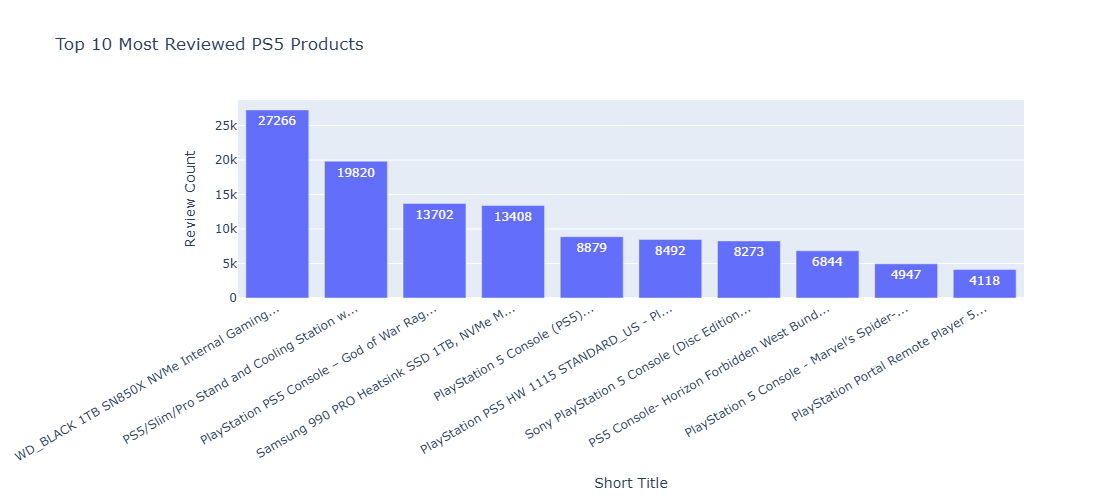

In [75]:

# Truncate long titles to 40 characters for readability
top_reviews = df.sort_values(by='Review Count', ascending=False).head(10).copy()
top_reviews['Short Title'] = top_reviews['Title'].str.slice(0, 40) + '...'

# Plot with shortened titles
fig = px.bar(
    top_reviews,
    x='Short Title',
    y='Review Count',
    title='Top 10 Most Reviewed PS5 Products',
    text='Review Count'
)

# Style tweaks
fig.update_layout(
    xaxis_tickangle=-30,
    height=500
)
fig.show()

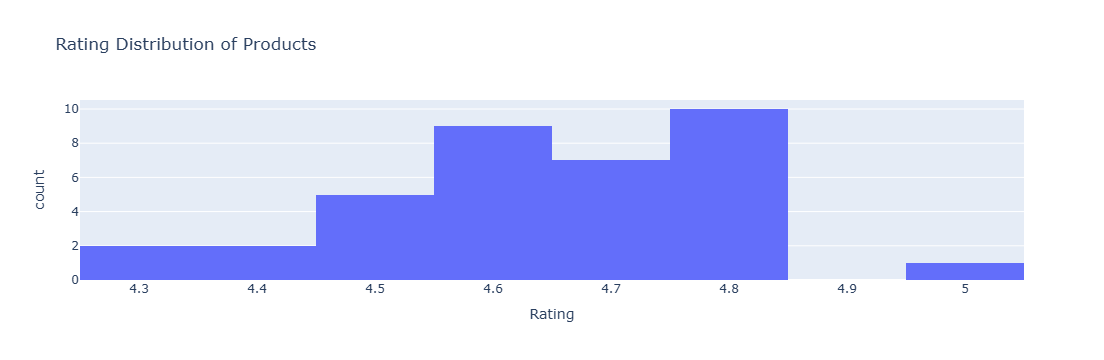

In [76]:
fig = px.histogram(df, x='Rating', nbins=10, title='Rating Distribution of Products')
fig.show()


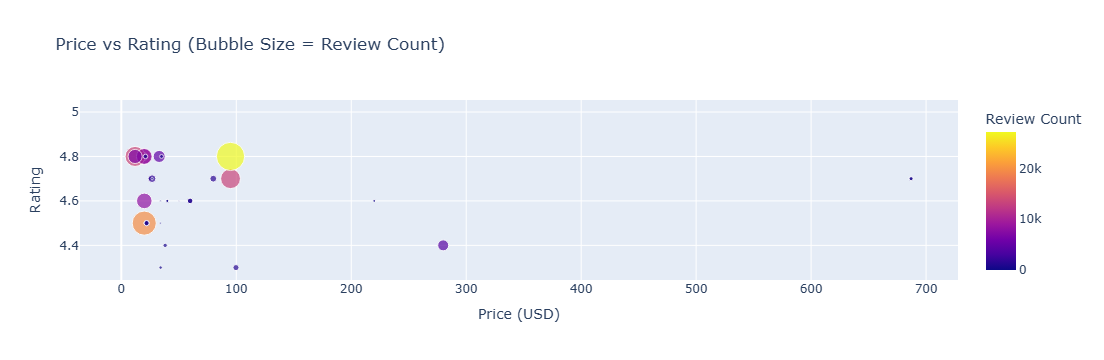

In [77]:
fig = px.scatter(
    df,
    x='Price (USD)',
    y='Rating',
    color='Review Count',
    size='Review Count',
    hover_data=['Title'],
    title='Price vs Rating (Bubble Size = Review Count)'
)
fig.show()


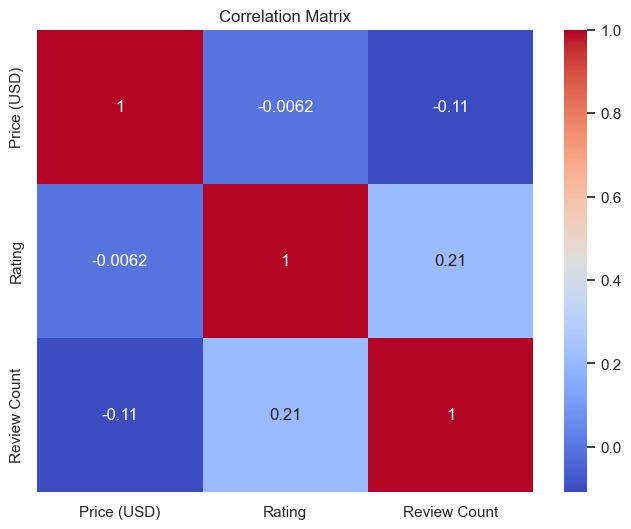

In [78]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['Price (USD)', 'Rating', 'Review Count']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


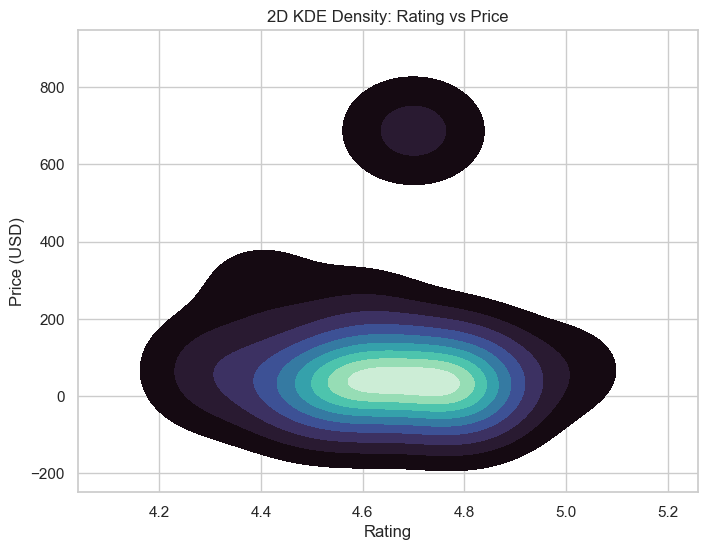

In [79]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.kdeplot(data=df, x='Rating', y='Price (USD)', fill=True, cmap='mako')
plt.title('2D KDE Density: Rating vs Price')
plt.show()


In [80]:
df.isnull().sum()

Title           0
Price (USD)     0
Rating          0
Review Count    0
Description     0
URL             0
dtype: int64

In [81]:
print("📐 Shape (rows, columns):", df.shape)
print("🧾 Column names:", df.columns.tolist())
print("🔍 Missing values:\n", df.isnull().sum())
print("📊 Summary info:")
df.info()

📐 Shape (rows, columns): (36, 6)
🧾 Column names: ['Title', 'Price (USD)', 'Rating', 'Review Count', 'Description', 'URL']
🔍 Missing values:
 Title           0
Price (USD)     0
Rating          0
Review Count    0
Description     0
URL             0
dtype: int64
📊 Summary info:
<class 'pandas.core.frame.DataFrame'>
Index: 36 entries, 1 to 39
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         36 non-null     object 
 1   Price (USD)   36 non-null     float64
 2   Rating        36 non-null     float64
 3   Review Count  36 non-null     int64  
 4   Description   36 non-null     object 
 5   URL           36 non-null     object 
dtypes: float64(2), int64(1), object(3)
memory usage: 2.0+ KB


In [52]:
df.isnull().sum()


Title           0
Price (USD)     0
Rating          0
Review Count    0
Description     0
URL             0
dtype: int64

In [53]:
df.head()

,Title,Price (USD),Rating,Review Count,Description,URL
1,PS5/Slim/Pro Stand and Cooling Station with LE...,19.93,4.5,19820,About this item Important Note : Fit All PS...,https://www.amazon.com/sspa/click?ie=UTF8&spc=...
2,PlayStation 5 Console (PS5),19.16,4.8,8879,About this item Model Number CFI-1215A01X. ...,https://www.amazon.com/PlayStation-5-Console-C...
3,PS5 Console - Fortnite Cobalt Star Disc Edition,24.88,4.7,694,About this item Fortnite Cobalt Star pack i...,https://www.amazon.com/PS5-Console-Fortnite-Co...
4,PlayStation 5 Console - Marvel’s Spider-Man 2 ...,32.92,4.8,4947,About this item Bundle includes Marvel’s Sp...,https://www.amazon.com/PlayStation-Console-Mar...
5,PlayStation PS5 Console - Fortnite Cobalt Star...,686.98,4.7,679,About this item Fortnite Cobalt Star pack i...,https://www.amazon.com/PlayStation-PS5-Console...


In [54]:
print(df.isnull().sum())


Title           0
Price (USD)     0
Rating          0
Review Count    0
Description     0
URL             0
dtype: int64


In [55]:
print(df.duplicated().sum())


0


In [56]:
df.to_csv("cleaned_data.csv", index=False)
